In [50]:
!pip install statsforecast

In [1]:
import pandas as pd

data = pd.read_excel('saving_data.xlsx')

In [4]:
data.head()

,Unnamed: 0,date,load_data
0,NaN,2022-04-01 00:15:00,16.07
1,NaN,2022-04-01 00:30:00,13.75
2,NaN,2022-04-01 00:45:00,13.13
3,NaN,2022-04-01 01:00:00,10.36
4,NaN,2022-04-01 01:15:00,9.96


In [7]:
import pandas as pd

Y_df = pd.read_parquet('https://datasets-nixtla.s3.amazonaws.com/m4-hourly.parquet')

Y_df.head()

,unique_id,ds,y
0,H1,1,605.0
1,H1,2,586.0
2,H1,3,586.0
3,H1,4,559.0
4,H1,5,511.0


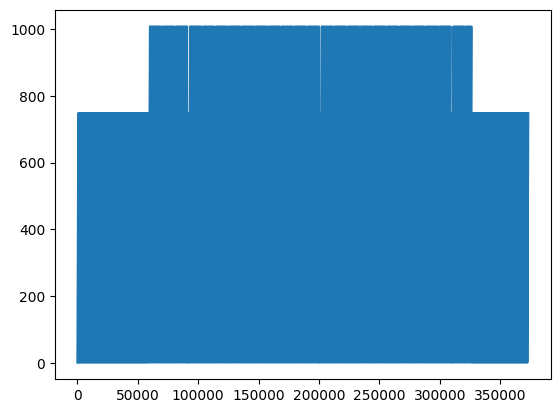

In [19]:
# plot y and ds
import matplotlib.pyplot as plt
plt.plot(Y_df['ds'])

In [23]:
Y_df['ds'].unique().__len__()

1008

In [25]:
uids = Y_df['unique_id'].unique()[:10] # Select 10 ids to make the example faster

Y_df = Y_df.query('unique_id in @uids') 
Y_df.head()

,unique_id,ds,y
0,H1,1,605.0
1,H1,2,586.0
2,H1,3,586.0
3,H1,4,559.0
4,H1,5,511.0


In [27]:

Y_df = Y_df.groupby('unique_id')

In [35]:
# get the data of one id
Y_df.get_group(uids[0]).shape

(748, 3)

In [41]:

Y_df = Y_df.tail(7 * 24) #Select last 7 days of data to make example faster

In [42]:
Y_df.shape

(1680, 3)

In [58]:

from statsforecast import StatsForecast

In [64]:
!pip install utilsforecast

  Obtaining dependency information for utilsforecast from https://files.pythonhosted.org/packages/d3/da/d000e49f126798e7667315056a789ae55adc58f0308f388a22a3836f281f/utilsforecast-0.0.6-py3-none-any.whl.metadata


In [70]:
from utilsforecast.plotting import plot_series
fig = plot_series(Y_df, plot_random=False, engine='plotly')
# fig.savefig('imgs/index.png', bbox_inches='tight')

In [71]:
fig